In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/breast_cancer_dataset.xlsx")

X = df.iloc[:,1:10]
print(X)
y = df.iloc[:, 10]
print(y)



In [38]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [41]:
classifier = Sequential()

In [54]:
# Adding the input layer and the first hidden layer
#classifier.add(Dense(output_dim=16,  init='uniform', activation='relu', input_dim=9))
classifier.add(Dense(16,activation="relu", input_dim=9, kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [55]:
# Adding the second hidden layer
classifier.add(Dense(16,activation="relu", kernel_initializer="uniform"))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [56]:
# Adding the output layer (output_dim is 1 as we want only 1 output from the final layer.)
classifier.add(Dense(1,activation="sigmoid", kernel_initializer="uniform"))

In [57]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size=5, epochs=100)

In [64]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

7/7 [==============================] - 0s 3ms/step


[Epoch:50] Our accuracy is 113.71428571428572%


<Axes: >

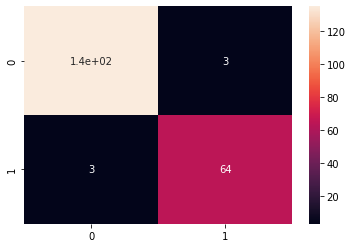

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


print("[Epoch:50] Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/175)*100))

sns.heatmap(cm,annot=True)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [67]:
Accuracy = accuracy_score(y_test, y_pred)

In [71]:
Precision = precision_score(y_test, y_pred)

In [72]:
Sensitivity_recall = recall_score(y_test, y_pred)

In [73]:
Specificity = recall_score(y_test, y_pred, pos_label=0)

In [74]:
F1_score = f1_score(y_test, y_pred)

In [75]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9707317073170731, 'Precision': 0.9552238805970149, 'Sensitivity_recall': 0.9552238805970149, 'Specificity': 0.9782608695652174, 'F1_score': 0.9552238805970149}


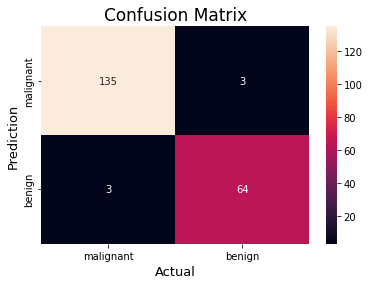

In [76]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()